In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/기계학습프로그래밍/실습 파일/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [37]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [38]:
# 3. 시퀀스 생성 함수
def make_dataset(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

In [39]:
# 4. 모델 생성 함수
def build_model(model_name, window):
    if model_name == "RNN":
        model = tf.keras.Sequential([
            tf.keras.layers.SimpleRNN(64, input_shape=(window,1)),
            tf.keras.layers.Dense(1)
        ])
    elif model_name == "LSTM":
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(64, input_shape=(window,1)),
            tf.keras.layers.Dense(1)
        ])
    else:
        raise ValueError("지원하지 않는 모델명입니다. 'RNN' 또는 'LSTM'만 가능합니다.")

    model.compile(optimizer='adam', loss='mse')
    return model

In [40]:
# 5. 시각화 함수
def plot_results(model_name, window, history, y_train_inv, y_test_inv, pred_train_inv, pred_test_inv):
    # 예측 결과 비교 그래프
    plt.figure(figsize=(10,4))
    plt.title(f'{model_name} Prediction (Window={window})')
    plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Train True', color='blue')
    plt.plot(np.arange(len(y_train_inv)), pred_train_inv, label='Train Pred', color='cyan', linestyle='--')
    plt.plot(np.arange(len(y_train_inv), len(y_train_inv)+len(y_test_inv)), y_test_inv, label='Test True', color='red')
    plt.plot(np.arange(len(y_train_inv), len(y_train_inv)+len(y_test_inv)), pred_test_inv, label='Test Pred', color='orange', linestyle='--')
    plt.legend()
    plt.show()

    # 손실 비교 그래프 (Train vs Validation)
    plt.figure(figsize=(6,3))
    plt.title(f'{model_name} Loss Comparison (Window={window})')
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.show()

In [41]:
# 6. 학습 및 평가 함수
def train_and_evaluate(model_name, window):
    print(f"\n===== [모델: {model_name}, 윈도우: {window}] =====")

    # 데이터 준비
    X, y = make_dataset(data, window)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # 모델 생성 및 학습
    model = build_model(model_name, window)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50, batch_size=8, verbose=0
    )

    # 예측
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # MSE 계산
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)

    # 역정규화
    y_train_inv = scaler.inverse_transform(y_train)
    y_test_inv = scaler.inverse_transform(y_test)
    pred_train_inv = scaler.inverse_transform(pred_train)
    pred_test_inv = scaler.inverse_transform(pred_test)

    # 결과 시각화
    plot_results(model_name, window, history, y_train_inv, y_test_inv, pred_train_inv, pred_test_inv)

    # 출력
    print(f"훈련 MSE: {mse_train:.6f}")
    print(f"테스트 MSE: {mse_test:.6f}")


===== [모델: RNN, 윈도우: 6] =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


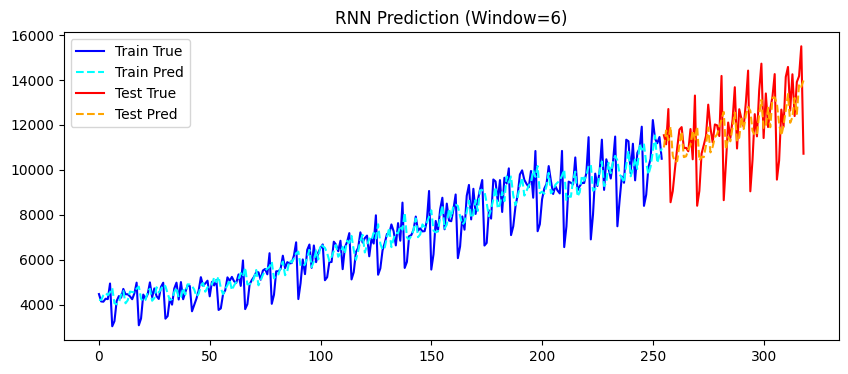

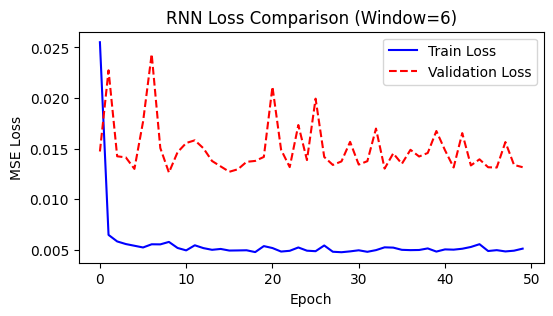

훈련 MSE: 0.004745
테스트 MSE: 0.013161

===== [모델: LSTM, 윈도우: 6] =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


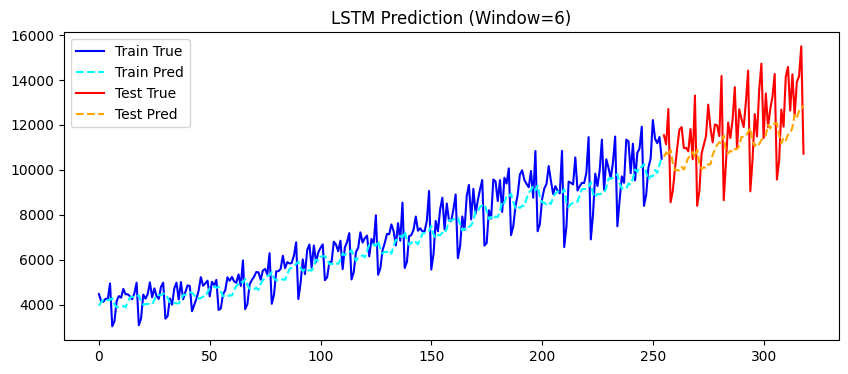

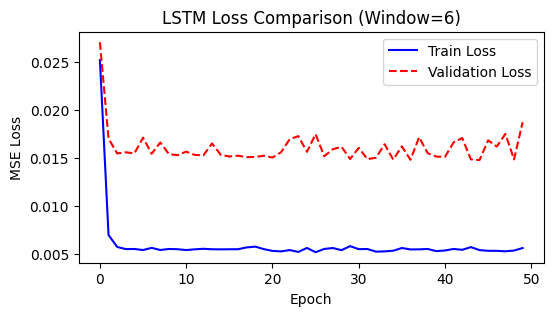

훈련 MSE: 0.005703
테스트 MSE: 0.018727

===== [모델: RNN, 윈도우: 12] =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


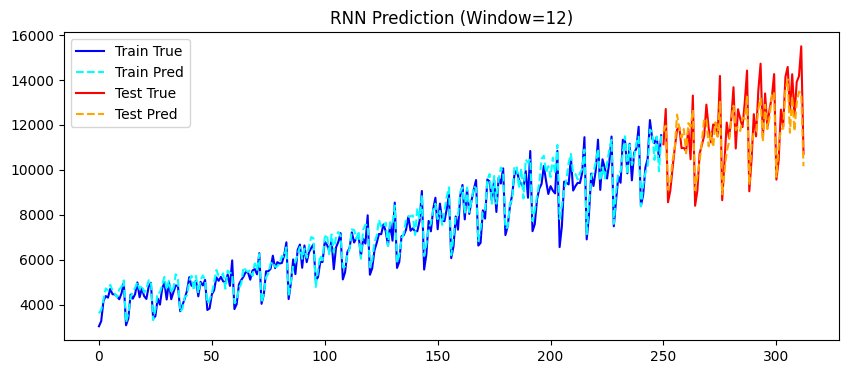

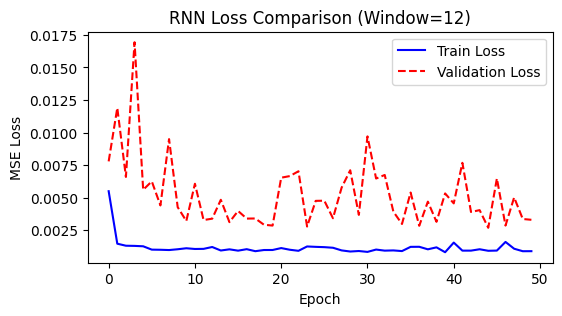

훈련 MSE: 0.001033
테스트 MSE: 0.003303

===== [모델: LSTM, 윈도우: 12] =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


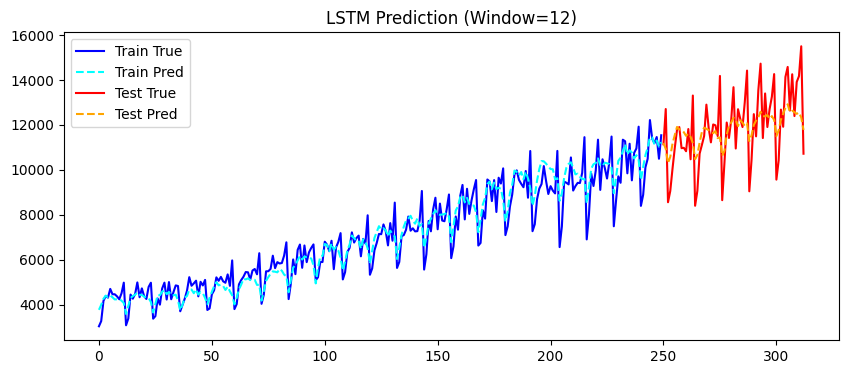

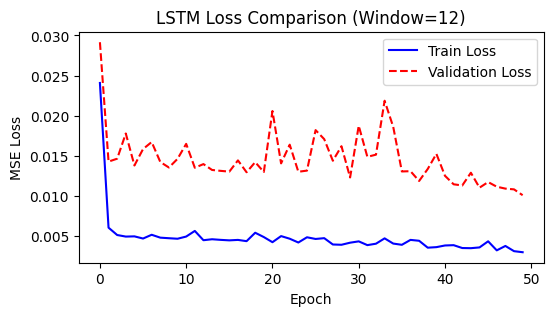

훈련 MSE: 0.002660
테스트 MSE: 0.010110


In [42]:
# 7. 실행 (모델 2개 × 윈도우 2개)
for w in [6, 12]:
    for model_name in ["RNN", "LSTM"]:
        train_and_evaluate(model_name, w)